Practice training a deep neural network on the CIFAR10 image dataset:

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [2]:
### Hw 7

import sys
import sklearn
import tensorflow as tf
assert tf.__version__ >= "2.0"
# Common imports
import numpy as np
import os
# to make this notebook's output stable across runs
np.random.seed(42)

import sys
from tensorflow import keras

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



In [3]:
(Xtrainset,Ytrainset),(Xtest,Ytest) =keras.datasets.cifar10.load_data()

In [4]:
trnnum = 40000
Xtrain = Xtrainset[:trnnum]
Xvalid = Xtrainset[trnnum:]
Ytrain = Ytrainset[:trnnum]
Yvalid = Ytrainset[trnnum:]

print('training set')
print(len(Xtrain))
print('test set')
print(len(Xtest))

training set
40000
test set
10000


In [8]:
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2019_11_26-18_22_30'

### 1. Visualize 20 examples of CIFAR

In [9]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

run_logdir2 = get_run_logdir()
run_logdir2

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 3200), started 0:00:40 ago. (Use '!kill 3200' to kill it.)

'./my_logs/run_2019_11_26-18_22_32'

Label for this image is [5]


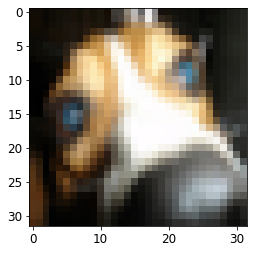

Label for this image is [3]


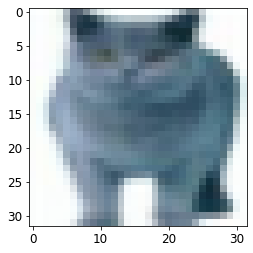

Label for this image is [7]


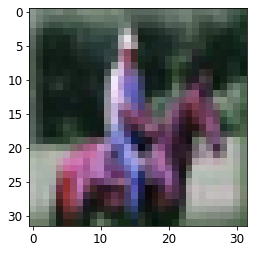

Label for this image is [5]


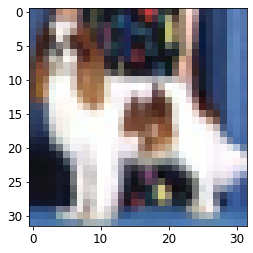

Label for this image is [0]


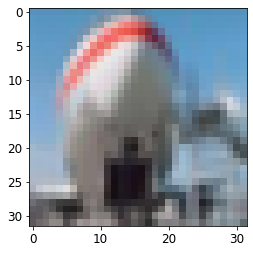

Label for this image is [4]


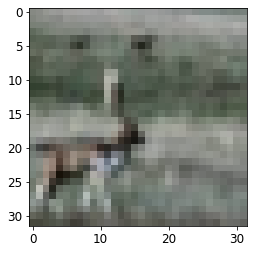

Label for this image is [9]


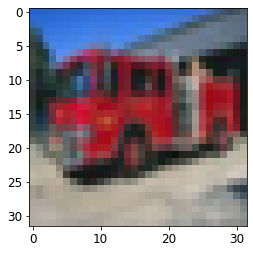

Label for this image is [7]


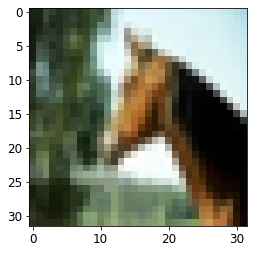

Label for this image is [2]


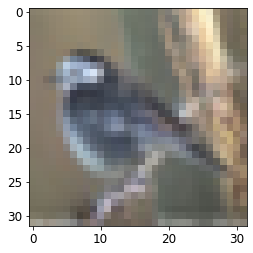

Label for this image is [5]


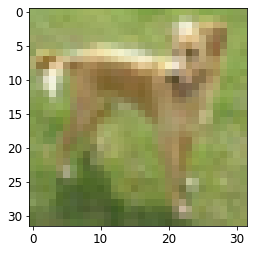

Label for this image is [6]


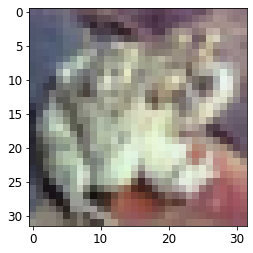

Label for this image is [4]


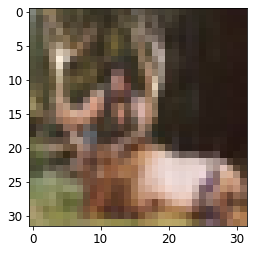

Label for this image is [7]


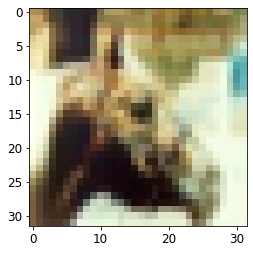

Label for this image is [2]


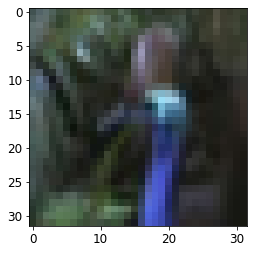

Label for this image is [1]


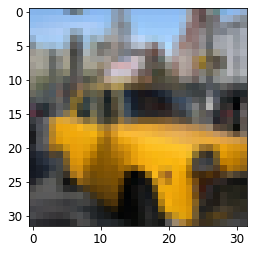

Label for this image is [0]


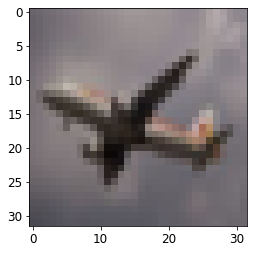

Label for this image is [1]


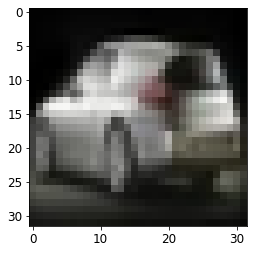

Label for this image is [4]


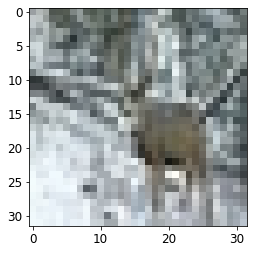

Label for this image is [6]


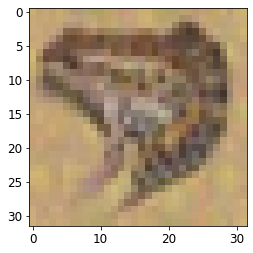

Label for this image is [5]


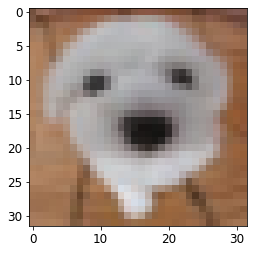

In [10]:
samples = np.random.randint(0,len(Xtrain),20)
for samplenum in samples:
    imagetmp = Xtrain[samplenum]
    print('Label for this image is {}'.format(Ytrain[samplenum]))
    plt.show(plt.imshow(imagetmp))
    

### 2. Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this exercise). Use He initialization and the ELU activation function. (use a for loop!!)

In [12]:
neurons = 100
layers = 20
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
for layer in range(layers):
    model.add(keras.layers.Dense(neurons, activation="elu",kernel_initializer = 'he_normal'))
model.add(keras.layers.Dense(10,activation='softmax'))

### 3. Using Adam optimization and early stopping, train the network on the CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_​data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes, so you’ll need a softmax output layer with 10 neurons. Remember to search for the right learning rate each time you change the model’s architecture or hyperparameters.

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True) 
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
            restore_best_weights=True)


history = model.fit(Xtrain, Ytrain, epochs=15,
                    validation_data=(Xvalid, Yvalid),
                    callbacks=[checkpoint_cb,early_stopping_cb,tensorboard_cb])

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 16s 394us/sample - loss: 4.3428 - accuracy: 0.3146 - val_loss: 2.2026 - val_accuracy: 0.1646
Epoch 2/15
40000/40000 [==============================] - 14s 362us/sample - loss: 2.1485 - accuracy: 0.1943 - val_loss: 2.1139 - val_accuracy: 0.2033
Epoch 3/15
40000/40000 [==============================] - 17s 419us/sample - loss: 2.0620 - accuracy: 0.2246 - val_loss: 2.0206 - val_accuracy: 0.2257
Epoch 4/15
40000/40000 [==============================] - 14s 357us/sample - loss: 1.9813 - accuracy: 0.2477 - val_loss: 1.9886 - val_accuracy: 0.2458
Epoch 5/15
40000/40000 [==============================] - 20s 499us/sample - loss: 1.9645 - accuracy: 0.2539 - val_loss: 1.9691 - val_accuracy: 0.2625
Epoch 6/15
40000/40000 [==============================] - 14s 362us/sample - loss: 1.9545 - accuracy: 0.2569 - val_loss: 2.0056 - val_accuracy: 0.2466
Epoch 7/15
40000/40000 [====================

Final accuracy of only 20%, with max at 30%
kept getting error when trying to wrap the keras classifer inside of sci-kit learn in order to fit the neural net hyperparameters and learning rate, but also tensorboard doesn't come out with any errors and isn't displaying the logged runs of models

### 4. Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?

In [32]:
neurons = 100
layers = 20
modelbatch = keras.models.Sequential()
modelbatch.add(keras.layers.Flatten(input_shape=[32,32,3]))
for layer in range(layers):
    modelbatch.add(keras.layers.BatchNormalization())
    modelbatch.add(keras.layers.Dense(neurons, activation="elu",kernel_initializer = 'he_normal'))
modelbatch.add(keras.layers.BatchNormalization())
modelbatch.add(keras.layers.Dense(10,activation='softmax'))

In [33]:
modelbatch.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = modelbatch.fit(Xtrain,Ytrain, epochs=15,
                    validation_data=(Xvalid,Yvalid),
                    callbacks=[early_stopping_cb])

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 37s 915us/sample - loss: 1.9315 - accuracy: 0.3096 - val_loss: 1.7518 - val_accuracy: 0.3776
Epoch 2/15
40000/40000 [==============================] - 31s 785us/sample - loss: 1.7502 - accuracy: 0.3719 - val_loss: 1.6377 - val_accuracy: 0.4132
Epoch 3/15
40000/40000 [==============================] - 34s 846us/sample - loss: 1.6710 - accuracy: 0.4065 - val_loss: 1.6220 - val_accuracy: 0.4287
Epoch 4/15
40000/40000 [==============================] - 33s 817us/sample - loss: 1.6185 - accuracy: 0.4247 - val_loss: 1.5527 - val_accuracy: 0.4436
Epoch 5/15
40000/40000 [==============================] - 35s 881us/sample - loss: 1.5776 - accuracy: 0.4430 - val_loss: 1.5558 - val_accuracy: 0.4513
Epoch 6/15
40000/40000 [==============================] - 38s 944us/sample - loss: 1.5359 - accuracy: 0.4598 - val_loss: 1.5007 - val_accuracy: 0.4846
Epoch 7/15
40000/40000 [====================

The final accuracy increased to ___
Batch normalization helped remove the vanishing gradient, and within the same number of epochs produced a much better model
I.e. the training speed itself is much faster to produce a better model with same number of epochs, but the computation time is longer with the added layers for normalization; Computationally it's taking 15 minutes just to train once with only 15 epochs, optimizing LR would take a while

### 5. Try replacing Batch Normalization with SELU, and make the necessary adjustments to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.

In [35]:
neurons = 100
layers = 20
modelselu = keras.models.Sequential()
modelselu.add(keras.layers.Flatten(input_shape=[32,32,3]))
for layer in range(layers):
    modelselu.add(keras.layers.Dense(neurons, activation="selu",kernel_initializer = 'lecun_normal'))
modelselu.add(keras.layers.Dense(10,activation='softmax'))

In [36]:
modelselu.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = modelselu.fit(Xtrain,Ytrain, epochs=15,
                    validation_data=(Xvalid,Yvalid),
                    callbacks=[early_stopping_cb])

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 17s 425us/sample - loss: 2.1233 - accuracy: 0.2107 - val_loss: 1.9700 - val_accuracy: 0.2504
Epoch 2/15
40000/40000 [==============================] - 15s 370us/sample - loss: 1.9484 - accuracy: 0.2657 - val_loss: 1.9265 - val_accuracy: 0.2588
Epoch 3/15
40000/40000 [==============================] - 19s 464us/sample - loss: 1.9056 - accuracy: 0.2789 - val_loss: 1.9543 - val_accuracy: 0.2778
Epoch 4/15
40000/40000 [==============================] - 17s 424us/sample - loss: 1.8847 - accuracy: 0.2920 - val_loss: 1.8834 - val_accuracy: 0.3067
Epoch 5/15
40000/40000 [==============================] - 16s 396us/sample - loss: 1.8720 - accuracy: 0.2989 - val_loss: 1.8553 - val_accuracy: 0.2994
Epoch 6/15
40000/40000 [==============================] - 16s 405us/sample - loss: 1.9574 - accuracy: 0.2603 - val_loss: 1.9750 - val_accuracy: 0.2425
Epoch 7/15
40000/40000 [====================

Unsure why SELU performing so poorly compared to batch normalization, should also be gtting rid of vanishing gradient but performing quicker